# Results_100
This follows the notebook Analysis_100

## Pupose
* ahahahahh
* ahahahahh
* ahahahahahh

In [1]:
#importing relevant libraries
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [2]:
df_cell = pd.read_csv('../data/CSV_files/Cells_info.csv') # reading in csv 

In [3]:
df_cell.head()

,nb_id,nb_language,workbook_index,cell_index,cell_type,num_words,lines_of_code
0,1122,python,NaN,0,code,NaN,7.0
1,1122,python,NaN,1,code,NaN,4.0
2,1122,python,NaN,2,code,NaN,12.0
3,1122,python,NaN,3,code,NaN,1.0
4,1122,python,NaN,4,code,NaN,6.0


## Notebook Language

Text(0.5,1,'Bar chart of most popular languages in notebooks')

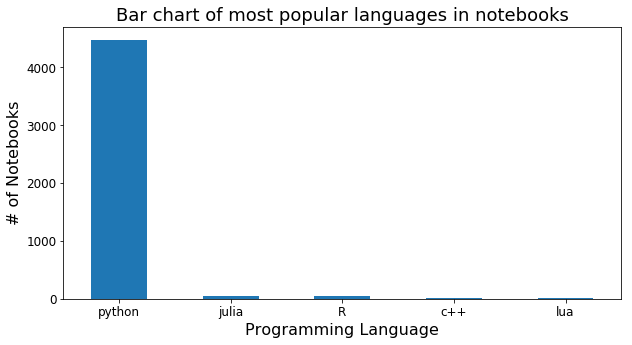

In [4]:
nb_language = df_cell.groupby(['nb_id', 'nb_language']).size().groupby('nb_language').size().sort_values(ascending=False).head()
nb_language.plot(kind='bar', figsize=(10,5), fontsize = 12, rot = 0)
plt.xlabel('Programming Language', fontsize = 16)
plt.ylabel('# of Notebooks', fontsize = 16)
plt.title('Bar chart of most popular languages in notebooks', fontsize = 18)

Here we can see, unsurprisingly, that python is the most popular language among jupyter notebooks with 4476. There are a few other languages but they don't come close to that utilised by python.

## Markdown vs Code

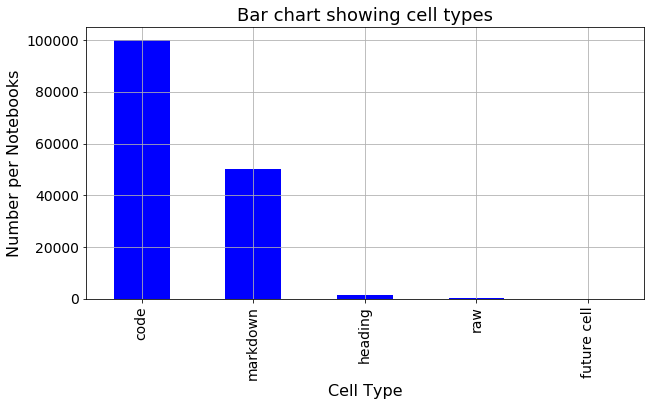

In [5]:
df_cell['cell_type'].value_counts().plot(kind = 'bar', figsize=(10,5), color = 'blue', fontsize = 14)
plt.xlabel('Cell Type', fontsize=16)
plt.ylabel('Number per Notebooks', fontsize=16)
plt.grid(True)
plt.title('Bar chart showing cell types', fontsize=18)
plt.savefig('../data/Images/cell_type.png', bbox_inches='tight')

Firstly,  the  cells  of  notebooks  were  investigated  looking  into  the  number  and  type  of  cells  in notebooks.  Above, we can see the proportion of cell types throughout the notebooks.Overall,  there  were  152,204  cells  in  all  the  notebooks.   We  see  most  of  the  cells  are  code  cellswith  nearly  100,000  cells  of  code  and  half  that  amount  are  markdown  at  nearly  50,000.   Thisgives  a  ratio  of  2:1  of  code  to  markdown  cells.   This  means  that  for  every  2  code  cells  there  isa markdown cell showing users are making use of markdown cells and explaining their code andanalysis. 

## Distribution of the number of cells per notebook

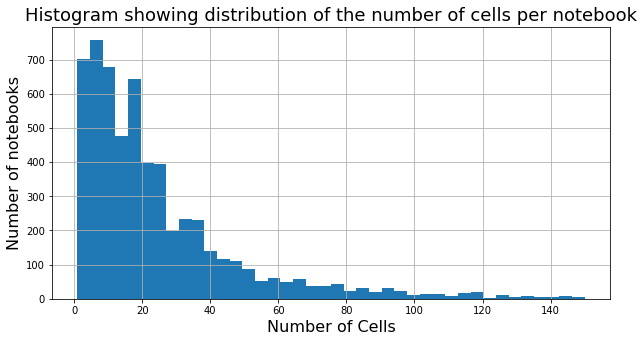

In [6]:
cells = df_cell.groupby('nb_id')['cell_index'].count().sort_values(ascending=False)
cells.hist(bins=40, range=(1,150), figsize=(10,5))
plt.xlabel('Number of Cells', fontsize=16)
plt.ylabel('Number of notebooks', fontsize=16)
plt.grid(True)
plt.title('Histogram showing distribution of the number of cells per notebook', fontsize=18)
plt.savefig('../data/Images/no_cells.png', bbox_inches='tight')

The average number of cells per notebook is 26 and we can see from the graph below that most notebooks contain between 0-10 cells

## Distribution of the number of code cells per notebook

In [7]:
df_cells_code = df_cell.loc[df_cell['cell_type'] == 'code']
code_cells = df_cells_code.groupby('nb_id')['cell_index'].count().sort_values(ascending=False)

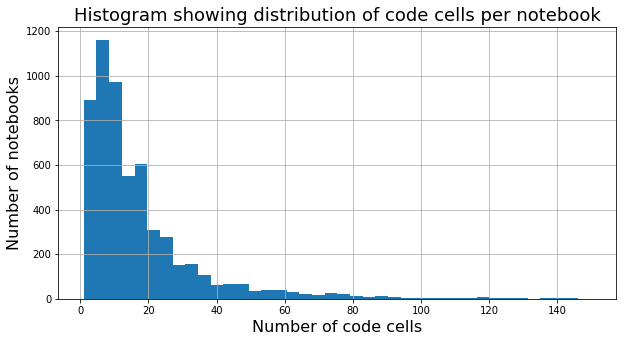

In [8]:
code_cells.hist(bins=40, range=(1,150), figsize=(10,5))
plt.xlabel('Number of code cells', fontsize=16)
plt.ylabel('Number of notebooks', fontsize=16)
plt.grid(True)
plt.title('Histogram showing distribution of code cells per notebook', fontsize=18)
plt.savefig('../data/Images/code_cells.png', bbox_inches='tight')

To investigate the notebooks further, the distribution of code and markdown cells per notebook was also explored.  The  average  number  of  code  cells  per  notebook  is  17.5,  this showing that about 2/3 of the average cells in a notebook (26) are code.  Most  notebooks,  about  1150  notebooks,  contain  around  10  cells.  As  the  number of cells becomes larger the notebook count becomes smaller.

## Distribution of the number of markdown cells per notebook

In [9]:
df_cells_markd = df_cell.loc[df_cell['cell_type'] == 'markdown']
markd_cells = df_cells_markd.groupby('nb_id')['cell_index'].count().sort_values(ascending=False)

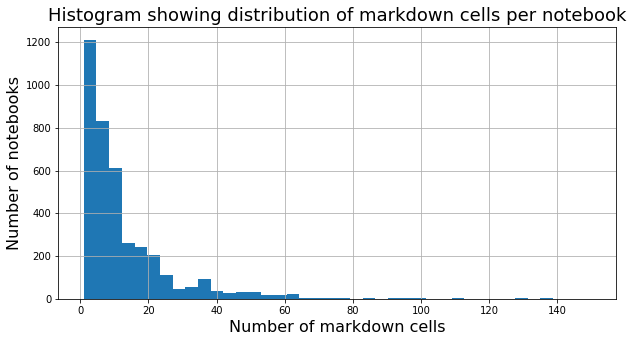

In [10]:
markd_cells.hist(bins=40, range=(1,150), figsize=(10,5))
plt.xlabel('Number of markdown cells', fontsize=16)
plt.ylabel('Number of notebooks', fontsize=16)
plt.grid(True)
plt.title('Histogram showing distribution of markdown cells per notebook', fontsize=18)
plt.savefig('../data/Images/markd_cells.png', bbox_inches='tight')

Exploring markdown cells, we see that most notebooks contain between 1-5 markdown cells. This low number may be due to notebooks having a small number of cells and not a reflection on the user’s failure to use literate programming tools provided by Jupyter notebooks.  The average number of markdown cells per notebook is 12.8, showing that about 1/3 of the average cells in a notebook (26) are markdown. The high average of markdown cells is a good reflection on users inclination to explain their exploration.

## Distribution of the lines of code per notebook

In [11]:
lines_code = df_cell.dropna(subset=['lines_of_code'])

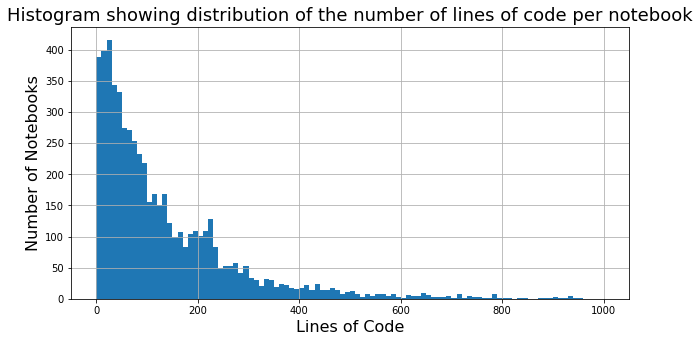

In [12]:
lines_code.groupby('nb_id')['lines_of_code'].sum().sort_values(ascending=False).hist(bins=100, range=(0, 1000), figsize=(10,5))
plt.xlabel('Lines of Code', fontsize=16)
plt.ylabel('Number of Notebooks', fontsize=16)
plt.grid(True)
plt.title('Histogram showing distribution of the number of lines of code per notebook', fontsize=18)
plt.savefig('../data/Images/code_lines.png', bbox_inches='tight')

Lines of code per notebook was also examined. The average number of code lines per notebook being 17. Most notebooks contained around 40 lines of code as you can see from the graph. We see also, as the lines of code per notebook increases above 300 the notebook count falls below 50.

## Distribution of the number of words per notebook

In [13]:
num_words = df_cell.dropna(subset=['num_words']) #dropping NaN values as those are not markdown cells

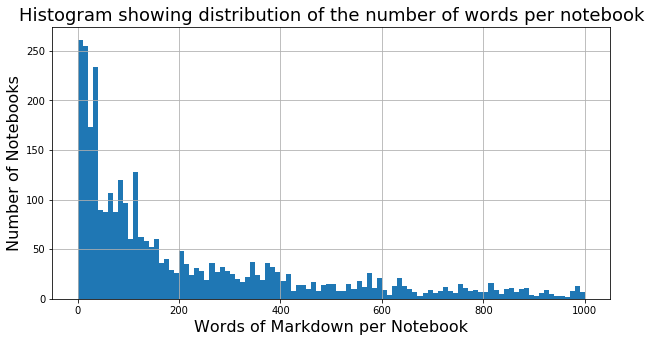

In [14]:
num_words.groupby('nb_id')['num_words'].sum().sort_values(ascending=False).hist(bins=100, range=(0, 1000), figsize=(10,5))
plt.xlabel('Words of Markdown per Notebook', fontsize=16)
plt.ylabel('Number of Notebooks', fontsize=16)
plt.grid(True)
plt.title('Histogram showing distribution of the number of words per notebook', fontsize=18)
plt.savefig('../data/Images/words_markd.png', bbox_inches='tight')

We see the distribution of the number of words in markdown cells per notebook.  Most notebooks have between 0-40 words and the average number of words per notebook is 551.5. This high number of words, around an A4 page worth of words, again shows the users willingness to use markdown cells to explain their code and analysis in detail.